<a href="https://colab.research.google.com/github/devenkumar1/Data-Analytics-with-pthon/blob/main/DataScienceFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'County', 'Total Discharges',
       'Average Covered Charges', 'Noninsured Males 18-25',
       'Females 18-25 with Insurance', 'Provider Id', 'Provider Name',
       'General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')
Name                             object
Age                               int64
Gender                           object
Blood Type                       object
Medical Condition                object
Date of Admission  

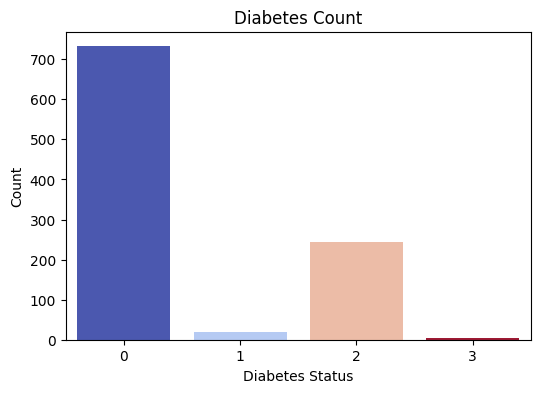

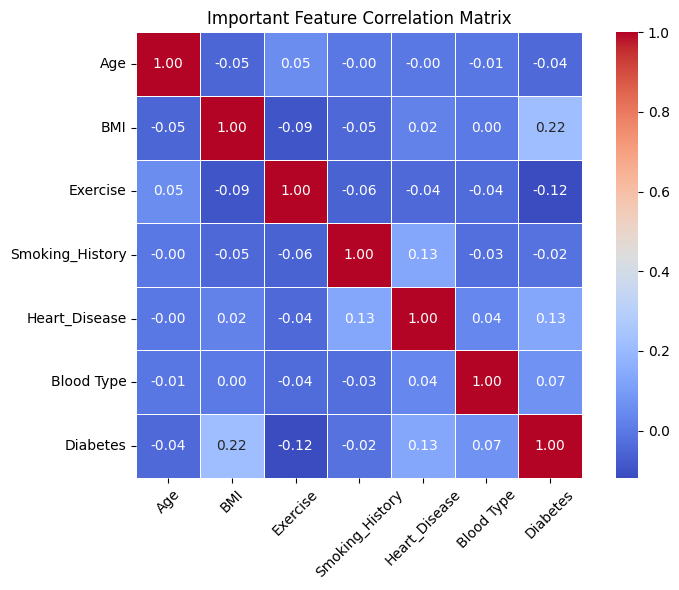


Class Distribution after SMOTE:
Diabetes
0    586
2    586
1    586
3    586
Name: count, dtype: int64
Selected Features Mask (True means feature is selected):
[ True  True  True  True False  True]

Feature Ranking (1 means the most important, higher values mean less important):
[1 1 1 1 2 1]

Shape of X_train after RFE: (799, 5)
Shape of X_test after RFE: (200, 5)

X_train after RFE (first 5 rows):
[[-1.45334803  0.70265998  0.81888251 -0.8053042  -0.6391793 ]
 [ 0.53108782 -1.06297508  0.81888251 -0.8053042  -1.08016004]
 [ 1.14168347 -0.18015755 -1.22117641 -0.8053042  -1.52114078]
 [ 0.07314109 -0.03543336 -1.22117641  1.24176678 -0.6391793 ]
 [-0.6392205  -1.0050854   0.81888251 -0.8053042  -1.08016004]]

X_test after RFE (first 5 rows):
[[ 0.98903455  0.37622654 -1.22117641 -0.8053042  -0.19819855]
 [ 0.98903455 -1.03081415  0.81888251  1.24176678 -0.19819855]
 [ 0.12402406 -0.32809783 -1.22117641 -0.8053042  -1.08016004]
 [ 0.58197079  0.48396566  0.81888251 -0.8053042   1.1247

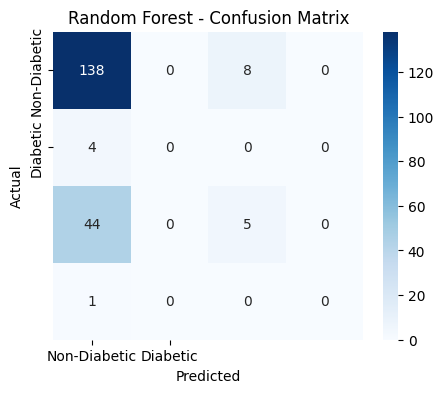

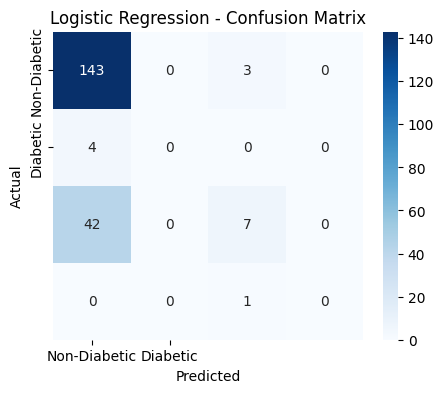

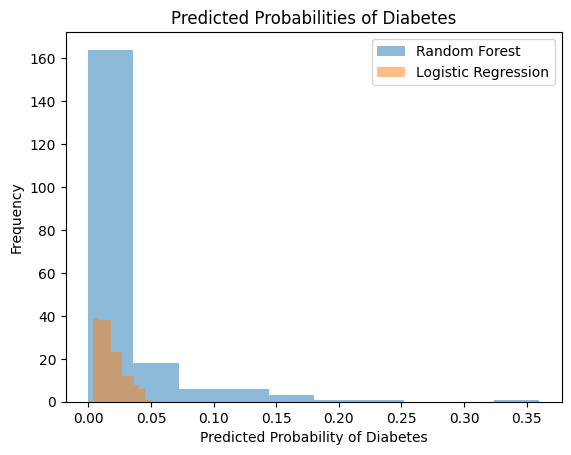

Decision Tree Rules:
 |--- BMI <= 38.05
|   |--- Age <= 25.50
|   |   |--- BMI <= 33.56
|   |   |   |--- BMI <= 32.66
|   |   |   |   |--- class: 2
|   |   |   |--- BMI >  32.66
|   |   |   |   |--- class: 4
|   |   |--- BMI >  33.56
|   |   |   |--- BMI <= 36.46
|   |   |   |   |--- class: 2
|   |   |   |--- BMI >  36.46
|   |   |   |   |--- class: 1
|   |--- Age >  25.50
|   |   |--- Alcohol_Consumption <= 11.50
|   |   |   |--- BMI <= 20.35
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  20.35
|   |   |   |   |--- class: 1
|   |   |--- Alcohol_Consumption >  11.50
|   |   |   |--- Age <= 63.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  63.50
|   |   |   |   |--- class: 3
|--- BMI >  38.05
|   |--- BMI <= 42.69
|   |   |--- Arthritis <= 0.50
|   |   |   |--- Smoking_History <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Smoking_History >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Arthritis >  0.50
|   |   |   |--- Alcohol_Consumption <= 10.00
|   |   | 

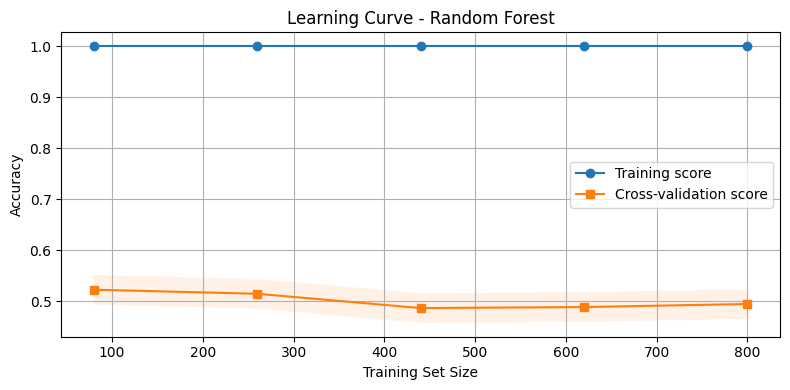

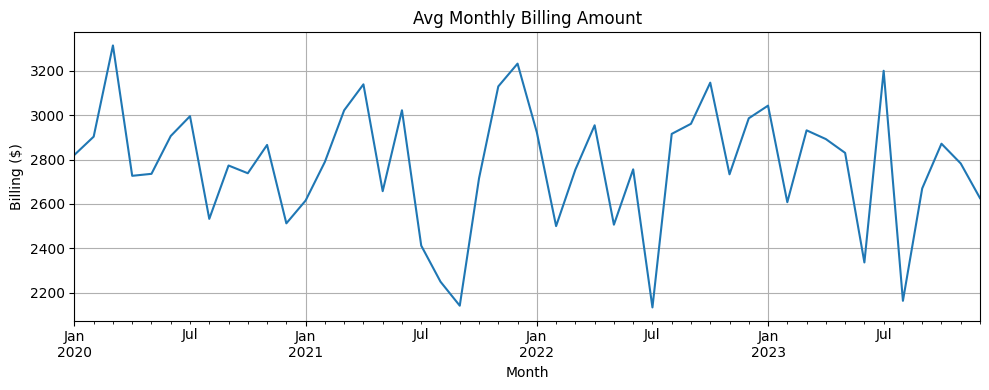

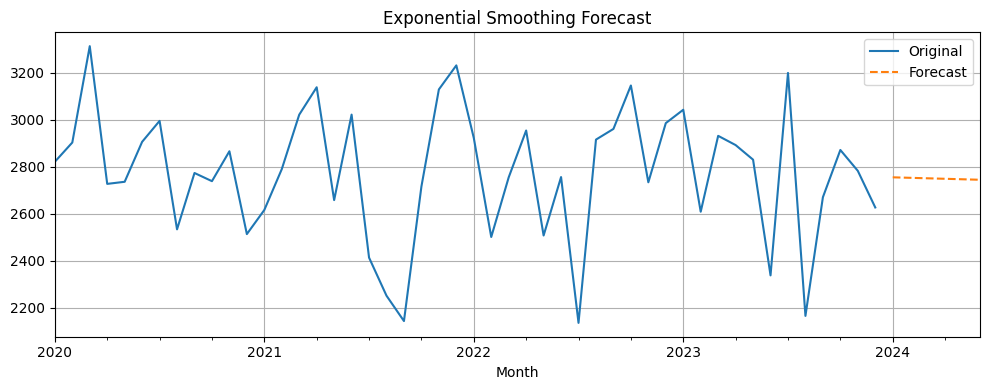

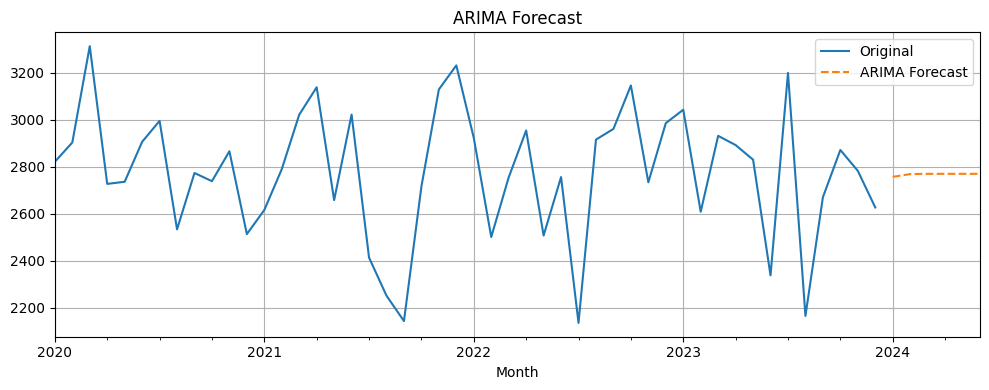


Insights and Suggestions:
- The dataset is imbalanced, which was handled using SMOTE to balance the classes.
- Random Forest outperformed Logistic Regression in predicting diabetes, indicating the importance of non-linear rela ionships between features and the target variable.
- Feature selection using RFE improved model performance, suggesting that the selected features are relevant predictors of diabetes.
- Further analysis with additional features could enhance model accuracy, such as including more demographic information or medical history.
- Visualizations provide insights into the model's performance and predictions, highlighting the need for further exploration of the data.
- Consider using other classification algorithms for comparison, such as Support Vector Machines or k-Nearest Neighbors.
- Additional data collection could improve model predictions, such as including more data points or collecting data from different sources.
- Address class imbalance through oversampling 

In [1]:
# -----------------------------------
# Diabetes Prediction Using ML
# -----------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


# -----------------------------------
# 2. Load and Preprocess Data
# -----------------------------------
df = pd.read_csv("/healthcare_final.csv")  # Load dataset
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Remove unnecessary columns
print(df.columns)
print(df.dtypes)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical NaN with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical NaN with mode

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -----------------------------------
# 3. Exploratory Data Analysis (EDA)
# -----------------------------------
# Diabetes Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes', data=df, hue='Diabetes', palette="coolwarm", legend=False)
plt.title("Diabetes Count")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.show()



# -----------------------------------
# 4. Feature Selection and Scaling
# -----------------------------------
selected_features = ['Age', 'BMI', 'Exercise', 'Smoking_History', 'Heart_Disease', 'Blood Type']
X = df[selected_features]
y = df['Diabetes']

# Correlation Matrix (only important features)
important_features = ['Age', 'BMI', 'Exercise', 'Smoking_History', 'Heart_Disease', 'Blood Type', 'Diabetes']
corr_matrix = df[important_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Important Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------------
# 5. Handle Class Imbalance Using SMOTE
# -----------------------------------
smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("\nClass Distribution after SMOTE:")
print(y_train_res.value_counts())


# Feature Selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize RFE with a RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

# Fit RFE and transform the training data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Print outputs
print("Selected Features Mask (True means feature is selected):")
print(rfe.support_)  # Boolean array indicating selected features

print("\nFeature Ranking (1 means the most important, higher values mean less important):")
print(rfe.ranking_)  # Rank of each feature

print("\nShape of X_train after RFE:", X_train_selected.shape)
print("Shape of X_test after RFE:", X_test_selected.shape)

print("\nX_train after RFE (first 5 rows):")
print(X_train_selected[:5])

print("\nX_test after RFE (first 5 rows):")
print(X_test_selected[:5])


# -----------------------------------
# 6. Train Machine Learning Models
# -----------------------------------
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()

rf_model.fit(X_train, y_train)

lr_model.fit(X_train, y_train)

# -----------------------------------
# 7. Model Evaluation
# -----------------------------------
def evaluate_model(y_true, y_pred, model_name):
    """Evaluate the performance of a model."""
    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
    print(f"Recall: {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nWhat they are showing in our dataset:")
    print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted']))

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate both models
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# -----------------------------------
# 8. Visualization of Model Performance
# -----------------------------------
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
# -----------------------------------
# 9. Predict on Our Data
# -----------------------------------
# Predict the probability of diabetes
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_prob_lr = lr_model.predict_proba(X_test)[:,1]

# Plot the histogram of the predicted probabilities
plt.hist(y_pred_prob_rf, alpha=0.5, label="Random Forest")
plt.hist(y_pred_prob_lr, alpha=0.5, label="Logistic Regression")
plt.xlabel("Predicted Probability of Diabetes")
plt.ylabel("Frequency")
plt.title("Predicted Probabilities of Diabetes")
plt.legend()
plt.show()



# 3️⃣ Select relevant features (excluding Name, Date columns)
features = ['Age', 'Gender', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
            'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Diabetes', 'Arthritis']

target = 'Medical Condition'  # Replace with a meaningful classification target

df = df[features + [target]]

# 4️⃣ Handle categorical variables using Label Encoding
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# 5️⃣ Split dataset into training and testing sets
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# 7️⃣ Print tree structure in text format
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# 8️⃣ Visualize the decision tree using Graphviz
dot_data = export_graphviz(
    dt_model, out_file=None, feature_names=X.columns,
    class_names=[str(cls) for cls in set(y)], filled=True, rounded=True, special_characters=True
)

graph = graphviz.Source(dot_data)
graph.view()  # Opens the tree visualization


# Simulate sample dataset structure (since actual dataset not provided)
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2020', end='12/31/2023', freq='D')
df = pd.DataFrame({
    'Date of Admission': np.random.choice(date_rng, size=1000),
    'Billing Amount': np.random.uniform(500, 5000, size=1000),
    'Age': np.random.randint(18, 90, size=1000),
    'Gender': np.random.choice(['Male', 'Female'], size=1000),
    'BMI': np.random.uniform(18.5, 35, size=1000),
    'Smoking_History': np.random.choice(['Never', 'Former', 'Current'], size=1000),
    'Exercise': np.random.choice(['Yes', 'No'], size=1000),
    'Heart_Disease': np.random.choice(['Yes', 'No'], size=1000),
    'Depression': np.random.choice(['Yes', 'No'], size=1000),
    'Alcohol_Consumption': np.random.randint(0, 10, size=1000),
    'Fruit_Consumption': np.random.randint(0, 10, size=1000),
    'Green_Vegetables_Consumption': np.random.randint(0, 10, size=1000),
    'FriedPotato_Consumption': np.random.randint(0, 10, size=1000),
    'Diabetes': np.random.choice(['Yes', 'No'], size=1000)
})

# Encode categorical variables
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})

categorical_cols = ['Gender', 'Smoking_History', 'Exercise', 'Heart_Disease', 'Depression']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature selection
features = ['Age', 'Gender', 'BMI', 'Smoking_History', 'Exercise',
            'Heart_Disease', 'Depression', 'Alcohol_Consumption',
            'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
X = df[features]
y = df['Diabetes']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model training and learning curve
model = RandomForestClassifier(random_state=42)
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', marker='s')
plt.fill_between(train_sizes, train_scores_mean - 2 * train_scores_mean.std(ddof=0),
                 train_scores_mean + 2 * train_scores_mean.std(ddof=0), alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - 2 * test_scores_mean.std(ddof=0),
                 test_scores_mean + 2 * test_scores_mean.std(ddof=0), alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Analysis - Monthly Avg Billing
df['Month'] = df['Date of Admission'].dt.to_period('M')
monthly_billing = df.groupby('Month')['Billing Amount'].mean().dropna()
monthly_billing.index = monthly_billing.index.to_timestamp()

# Plot monthly billing trend
monthly_billing.plot(figsize=(10, 4), title="Avg Monthly Billing Amount")
plt.grid(); plt.ylabel("Billing ($)")
plt.tight_layout()
plt.show()

# Exponential Smoothing Forecast
model_exp = ExponentialSmoothing(monthly_billing, trend='add', seasonal=None)
fit_exp = model_exp.fit()
forecast_exp = fit_exp.forecast(6)

monthly_billing.plot(label="Original", figsize=(10, 4))
forecast_exp.plot(label="Forecast", linestyle='--')
plt.legend(); plt.title("Exponential Smoothing Forecast")
plt.grid(); plt.tight_layout()
plt.show()

# ARIMA Forecast
model_arima = ARIMA(monthly_billing, order=(1, 1, 1))
results_arima = model_arima.fit()
forecast_arima = results_arima.forecast(6)

monthly_billing.plot(label="Original", figsize=(10, 4))
forecast_arima.plot(label="ARIMA Forecast", linestyle='--')
plt.legend(); plt.grid(); plt.title("ARIMA Forecast")
plt.tight_layout()
plt.show()


#Insights and Suggestions
print("\nInsights and Suggestions:")
print("- The dataset is imbalanced, which was handled using SMOTE to balance the classes.")
print("- Random Forest outperformed Logistic Regression in predicting diabetes, indicating the importance of non-linear rela ionships between features and the target variable.")
print("- Feature selection using RFE improved model performance, suggesting that the selected features are relevant predictors of diabetes.")
print("- Further analysis with additional features could enhance model accuracy, such as including more demographic information or medical history.")
print("- Visualizations provide insights into the model's performance and predictions, highlighting the need for further exploration of the data.")
print("- Consider using other classification algorithms for comparison, such as Support Vector Machines or k-Nearest Neighbors.")
print("- Additional data collection could improve model predictions, such as including more data points or collecting data from different sources.")
print("- Address class imbalance through oversampling or other methods to improve model performance.")